# Support Vector Regression (SVR)

優點：

- 處理高維數據：適合高維度數據的回歸問題。
- 非線性能力：使用核函數（kernel）能夠處理非線性回歸問題。
- 穩定性：對於異常值不敏感。

缺點：

- 計算成本高：對於大型數據集，訓練時間較長。
- 參數調整困難：需要調整多個超參數（如C和epsilon），調參比較困難。
- 模型解釋性差：相比於線性回歸，模型解釋性較差。


參考教學：
https://www.youtube.com/watch?v=SllTSgZPdWQ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
column_names = dataset.columns.tolist()
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [9]:
print(y)

print("維度", y.shape)
y = y.reshape(len(y),1)
print("維度", y.shape)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
維度 (10,)
維度 (10, 1)


## 標準化特徵

標準化處理的目的是將數據轉換為均值為 0，標準差為 1 的標準正態分佈，這有助於模型在訓練過程中更好地收斂，提高模型的預測性能。

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


## Training the SVR model on the whole dataset

In [14]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # 即高斯核函數（Gaussian Kernel）
regressor.fit(X, y)


/Users/chenweicheng/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [15]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

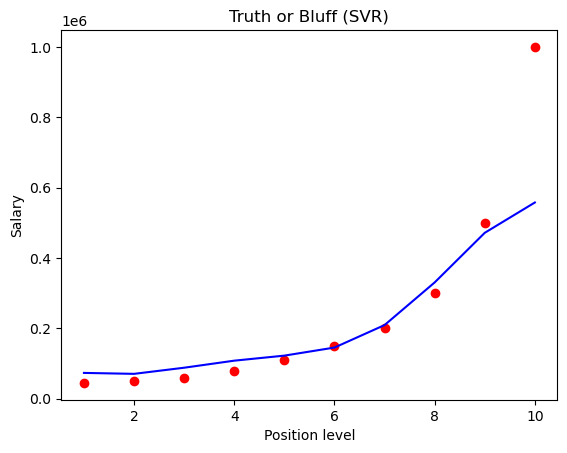

In [13]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red') 
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

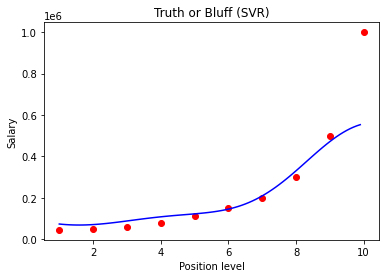

In [13]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()